<a href="https://colab.research.google.com/github/TrBn17/Churn-Customer-Prediction/blob/main/Churn_Customer_Prediction_(UPDATE_VERSION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
import pandas as pd
import numpy as np

In [213]:
df= pd.read_csv('/content/churn-bigml-80.csv')

In [214]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

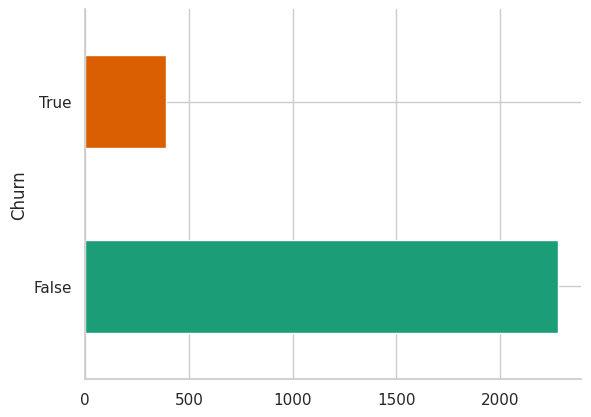

In [217]:
# @title Churn
df.groupby('Churn').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [218]:
object_cols = [f for f in df.columns if df[f].dtype == "O"]
print(object_cols)

['State', 'International plan', 'Voice mail plan']


In [219]:
numeric_cols = [f for f in df.columns if df[f].dtype != "O"]
print(numeric_cols)

['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


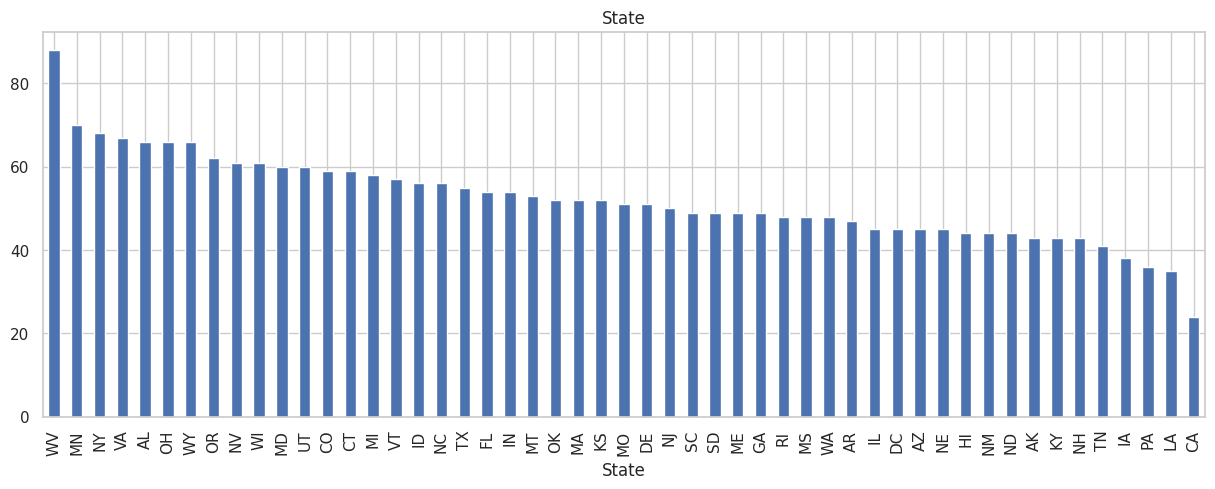

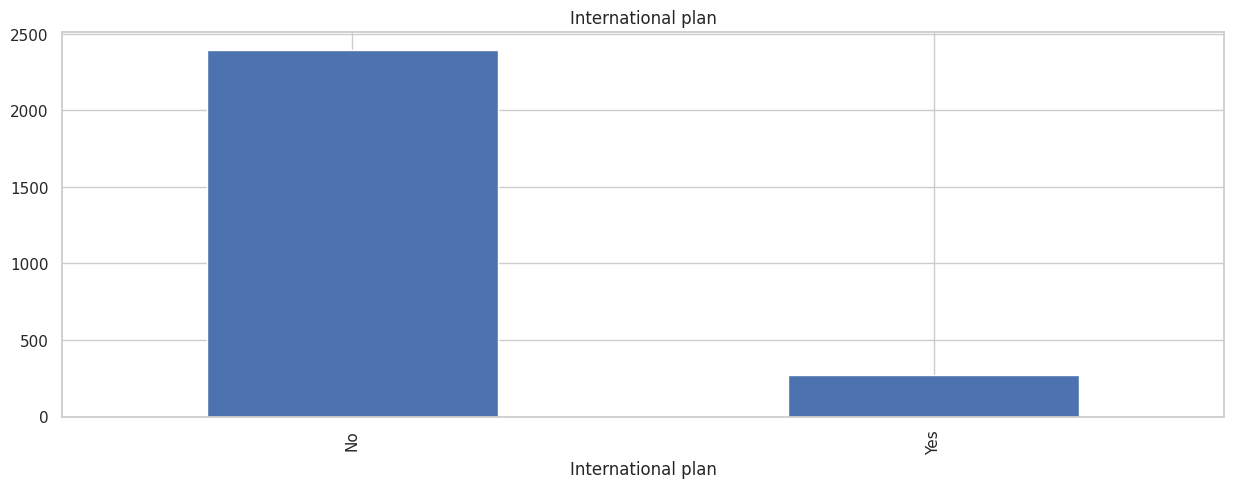

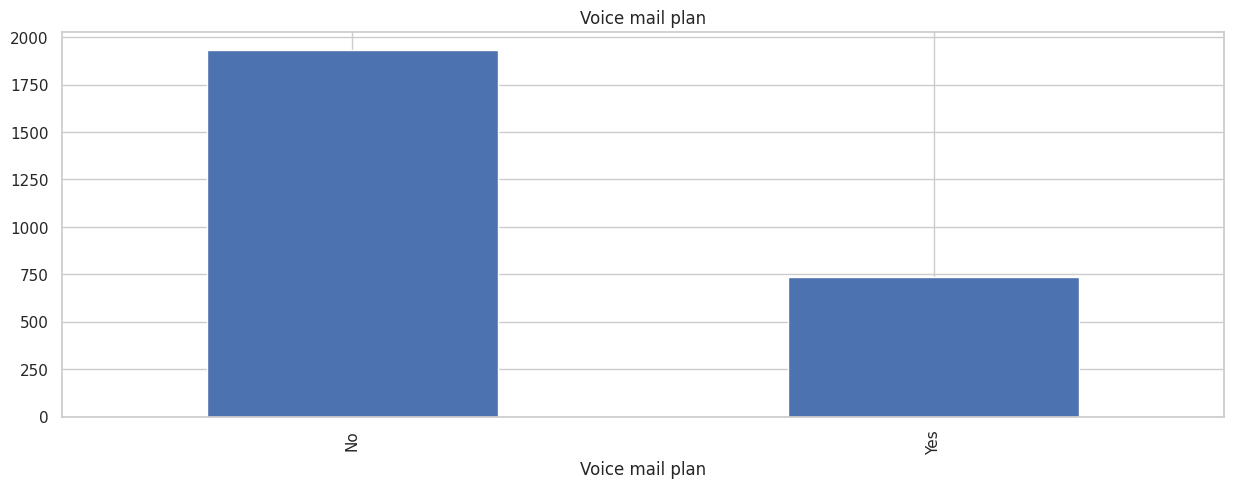

In [220]:
for col in object_cols:
  df[col].value_counts().plot(kind='bar', figsize=(15,5))
  plt.title(col)
  plt.show()

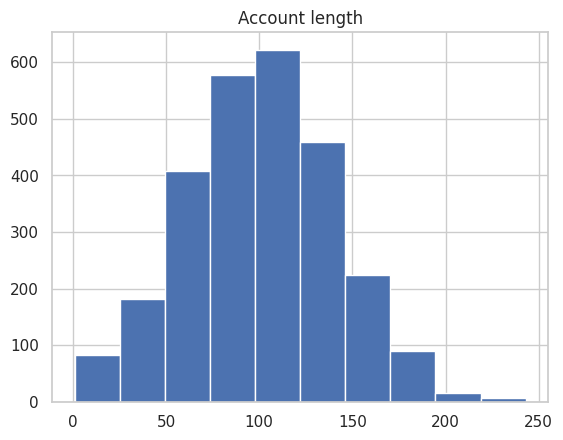

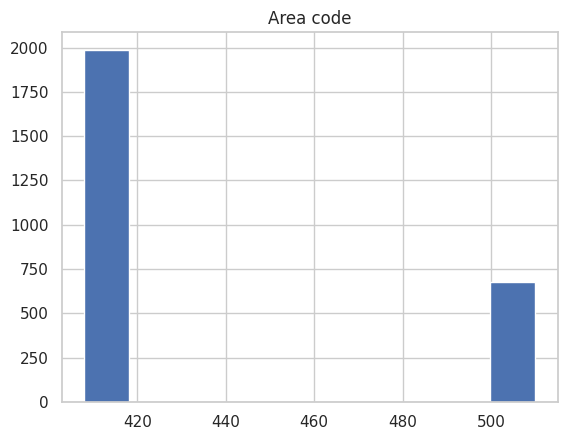

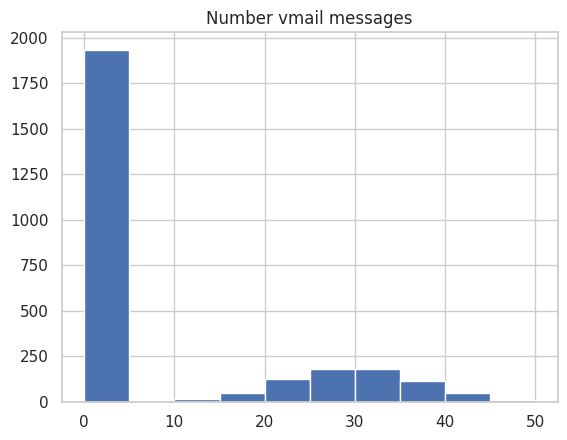

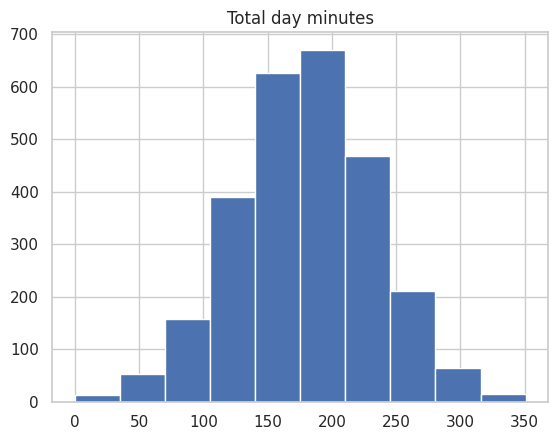

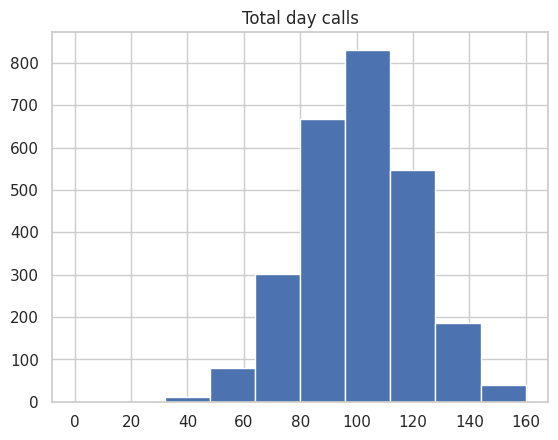

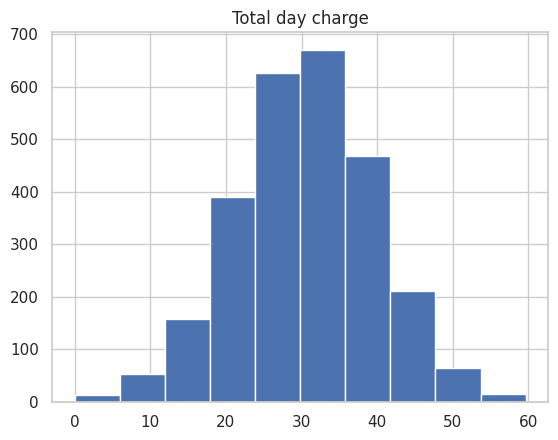

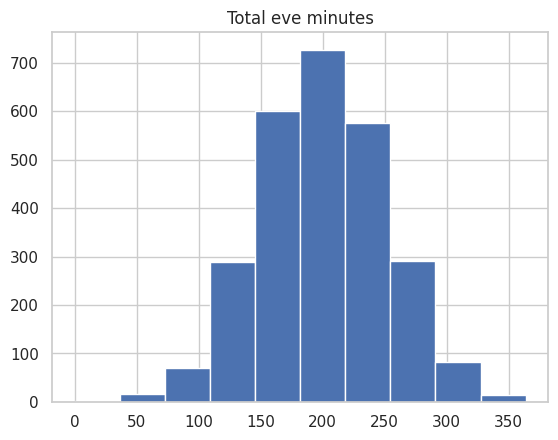

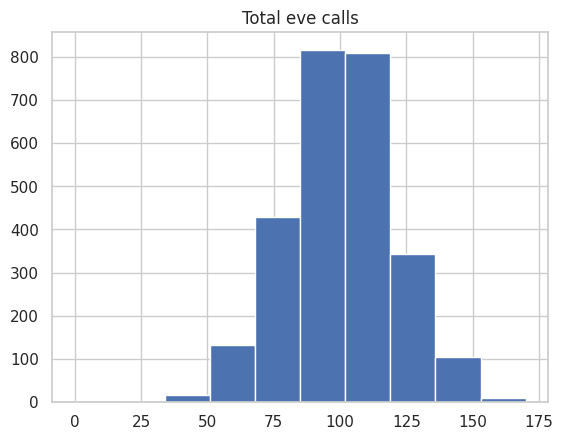

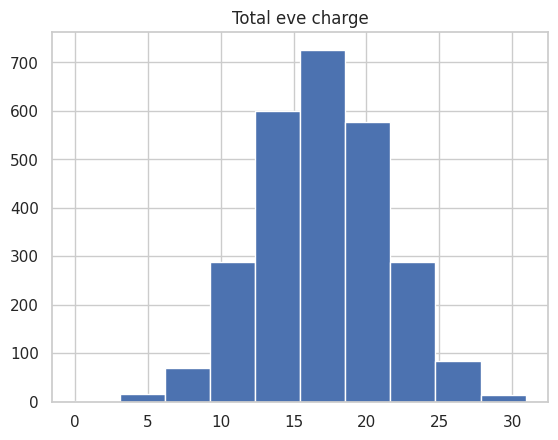

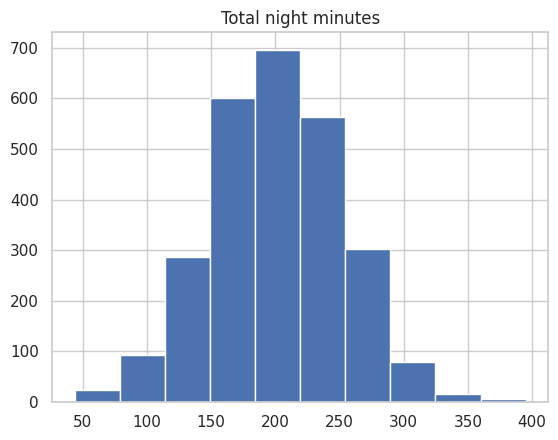

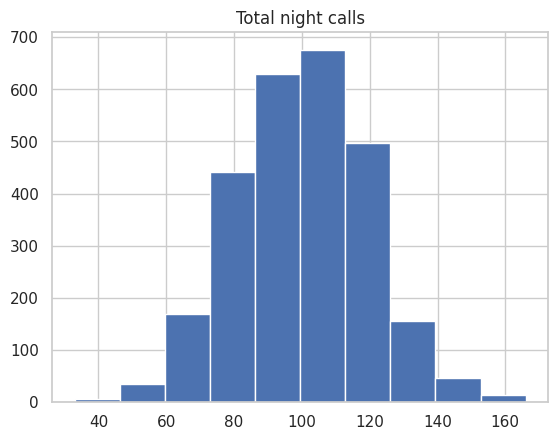

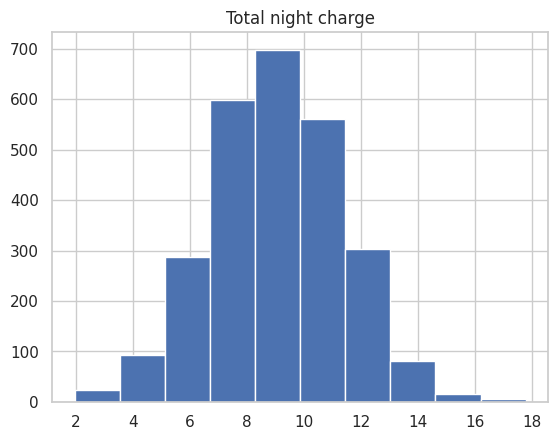

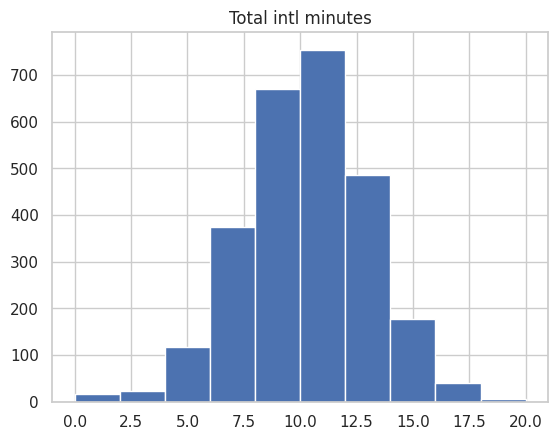

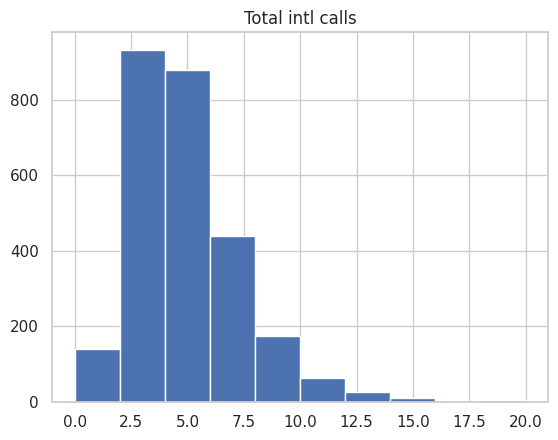

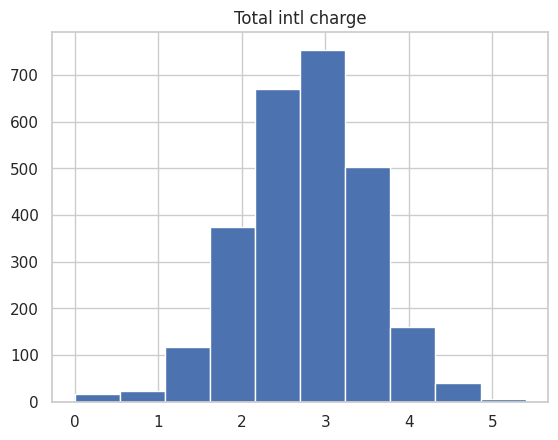

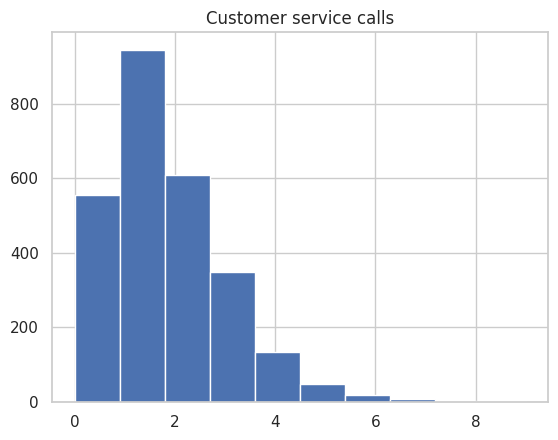

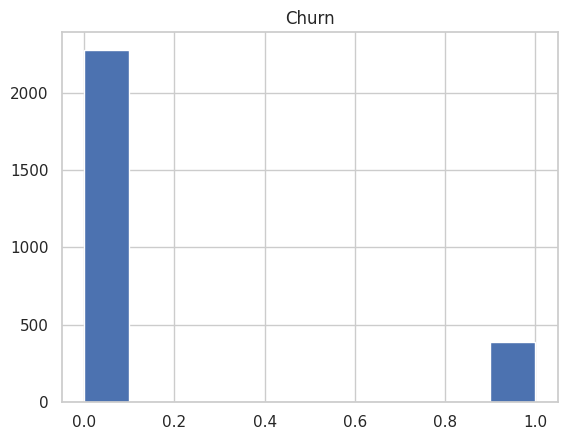

In [221]:
for col in numeric_cols:
    df[col] = df[col].astype(float)
    df[col].hist()
    plt.title(col)
    plt.show()

In [222]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['State', 'International plan', 'Voice mail plan', 'Churn']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [223]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128.0,415.0,0,1,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0
1,35,107.0,415.0,0,1,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0
2,31,137.0,415.0,0,0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0
3,35,84.0,408.0,1,0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0
4,36,75.0,415.0,1,0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,40,79.0,415.0,0,0,0.0,134.7,98.0,22.90,189.7,68.0,16.12,221.4,128.0,9.96,11.8,5.0,3.19,2.0,0
2662,3,192.0,415.0,0,1,36.0,156.2,77.0,26.55,215.5,126.0,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0,0
2663,49,68.0,415.0,0,0,0.0,231.1,57.0,39.29,153.4,55.0,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,0
2664,39,28.0,510.0,0,0,0.0,180.8,109.0,30.74,288.8,58.0,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,0


In [224]:
# Summary statistics
summary_stats = df.describe()

# Distribution of the target variable
churn_distribution = df['Churn'].value_counts()

summary_stats, churn_distribution

(             State  Account length    Area code  International plan  \
 count  2666.000000     2666.000000  2666.000000         2666.000000   
 mean     26.036009      100.620405   437.438860            0.101275   
 std      14.921792       39.563974    42.521018            0.301750   
 min       0.000000        1.000000   408.000000            0.000000   
 25%      13.000000       73.000000   408.000000            0.000000   
 50%      26.000000      100.000000   415.000000            0.000000   
 75%      39.000000      127.000000   510.000000            0.000000   
 max      50.000000      243.000000   510.000000            1.000000   
 
        Voice mail plan  Number vmail messages  Total day minutes  \
 count      2666.000000            2666.000000         2666.00000   
 mean          0.274944               8.021755          179.48162   
 std           0.446570              13.612277           54.21035   
 min           0.000000               0.000000            0.00000   
 25% 

In [225]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,1.00,-0.01,0.01,-0.00,-0.02,-0.01,-0.00,0.01,-0.00,0.01,-0.01,0.01,0.03,0.01,0.03,-0.01,0.01,-0.01,-0.03,0.00
Account length,-0.01,1.00,-0.01,0.02,0.00,-0.00,0.00,0.04,0.00,-0.02,0.02,-0.02,-0.01,-0.02,-0.01,0.01,0.02,0.01,0.00,0.02
Area code,0.01,-0.01,1.00,0.05,0.01,-0.00,-0.02,-0.01,-0.02,0.00,-0.02,0.00,-0.00,0.01,-0.00,-0.01,-0.03,-0.01,0.03,0.00
International plan,-0.00,0.02,0.05,1.00,0.00,0.01,0.05,-0.00,0.05,0.03,0.01,0.03,-0.01,0.02,-0.01,0.05,0.01,0.05,-0.04,0.28
Voice mail plan,-0.02,0.00,0.01,0.00,1.00,0.96,0.01,-0.01,0.01,0.02,0.00,0.02,0.00,0.01,0.00,-0.01,0.02,-0.01,-0.02,-0.10
Number vmail messages,-0.01,-0.00,-0.00,0.01,0.96,1.00,0.02,-0.01,0.02,0.01,0.01,0.01,-0.00,0.01,-0.00,-0.00,0.03,-0.00,-0.02,-0.09
Total day minutes,-0.00,0.00,-0.02,0.05,0.01,0.02,1.00,0.02,1.00,0.00,0.01,0.00,0.01,0.02,0.01,-0.01,0.01,-0.01,-0.02,0.20
Total day calls,0.01,0.04,-0.01,-0.00,-0.01,-0.01,0.02,1.00,0.02,-0.03,0.01,-0.03,0.01,-0.02,0.01,0.03,0.01,0.03,-0.01,0.02
Total day charge,-0.00,0.00,-0.02,0.05,0.01,0.02,1.00,0.02,1.00,0.00,0.01,0.00,0.01,0.02,0.01,-0.01,0.01,-0.01,-0.02,0.20
Total eve minutes,0.01,-0.02,0.00,0.03,0.02,0.01,0.00,-0.03,0.00,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.07


In [226]:
columns_to_drop = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
df_dropped = df.drop(columns=columns_to_drop)

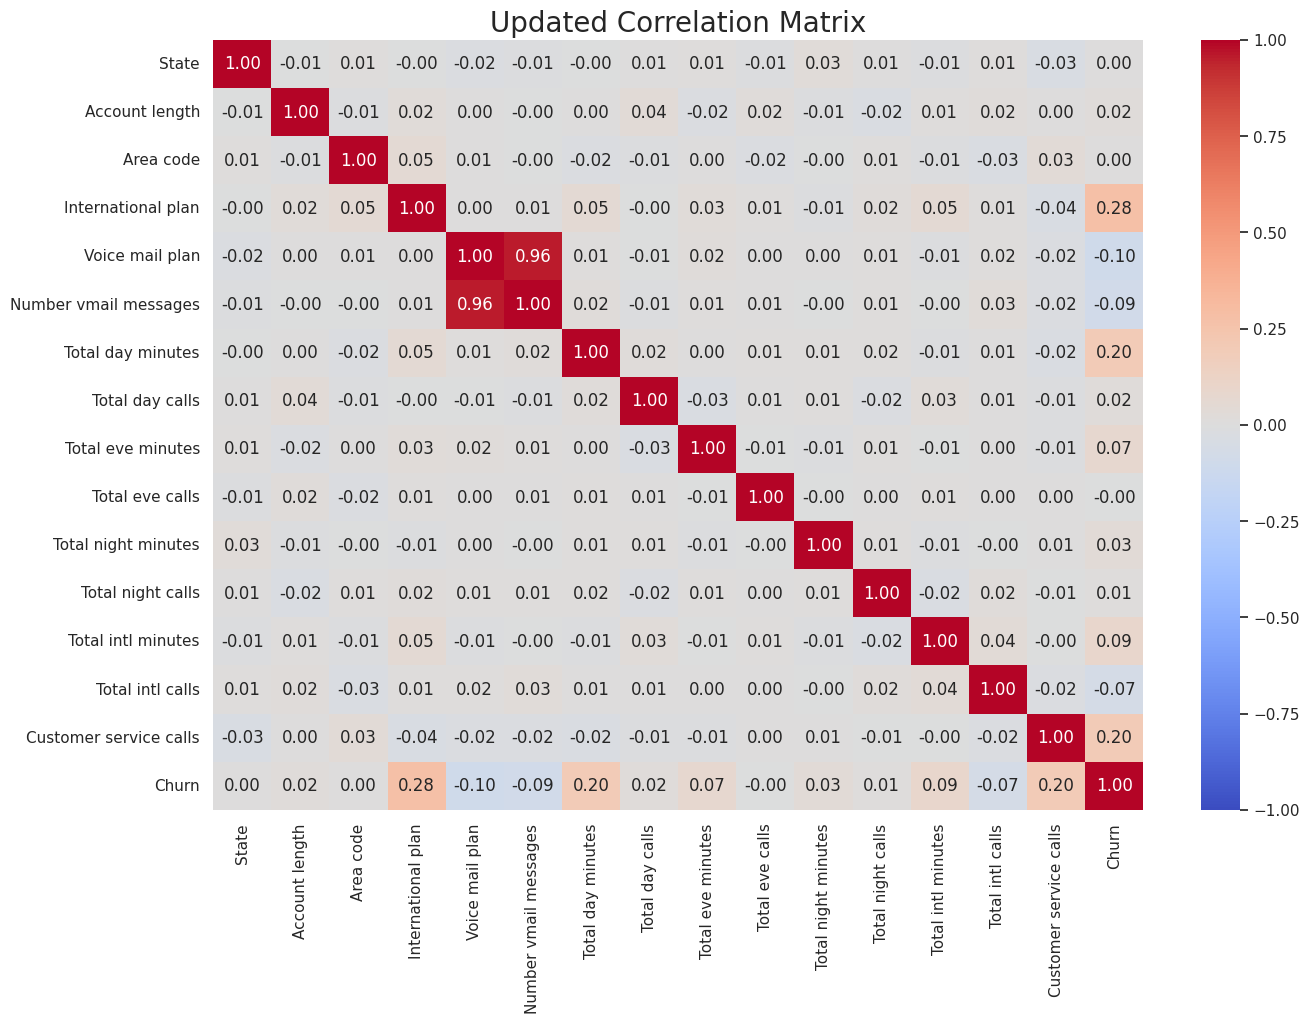

In [227]:

updated_corr_matrix = df_dropped.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(updated_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Updated Correlation Matrix', size=20)
plt.show()


In [244]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
X = df_dropped.drop('Churn', axis=1)
y = df_dropped['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
lr= LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [245]:
y_pred_lr = lr.predict(X_test)

In [246]:
print(classification_report( y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81       455
           1       0.29      0.68      0.41        79

    accuracy                           0.71       534
   macro avg       0.61      0.70      0.61       534
weighted avg       0.83      0.71      0.75       534



In [247]:
from sklearn.ensemble import RandomForestClassifier

In [248]:
clf = RandomForestClassifier(criterion="gini",
                            max_depth=10,
                            min_samples_split=10,
                            random_state=42)

In [249]:
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [250]:
y_pred_rf = clf.predict(X_test)

In [251]:
print(classification_report( y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       455
           1       0.78      0.71      0.74        79

    accuracy                           0.93       534
   macro avg       0.86      0.84      0.85       534
weighted avg       0.92      0.93      0.93       534



In [258]:
import xgboost as xgb
from xgboost import XGBClassifier

In [261]:
xgb_model = XGBClassifier(random_state=42, n_estimators = 200)

In [262]:
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [264]:
y_pred_xgb = xgb_model.predict(X_test)

In [275]:
print(classification_report( y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       455
           1       0.90      0.77      0.83        79

    accuracy                           0.95       534
   macro avg       0.93      0.88      0.90       534
weighted avg       0.95      0.95      0.95       534



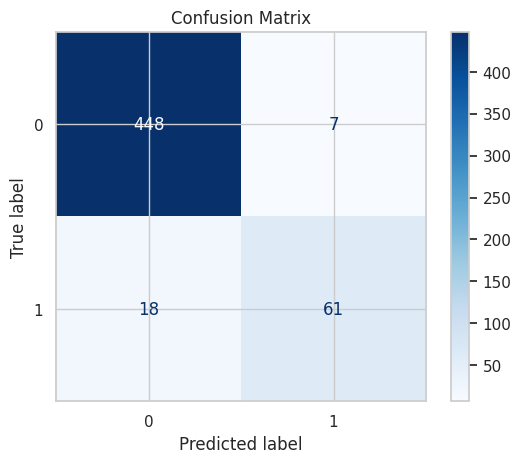

In [278]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [276]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, make_scorer
parameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.3, 0.7]
}
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=parameters,
    scoring=make_scorer(accuracy_score),
    cv=3,
    verbose=1
)
grid_search.fit(X_train_resampled, y_train_resampled)
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best accuracy: 0.9418719767525809
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       455
           1       0.91      0.76      0.83        79

    accuracy                           0.95       534
   macro avg       0.93      0.87      0.90       534
weighted avg       0.95      0.95      0.95       534



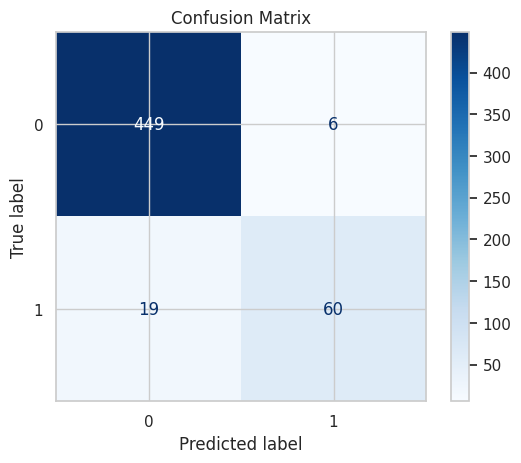

In [277]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [284]:
df_test= pd.read_csv('/content/churn-bigml-20.csv')

In [288]:
categorical_columns = ['State', 'International plan', 'Voice mail plan', 'Churn']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_test[col] = le.fit_transform(df_test[col])
    label_encoders[col] = le

In [286]:
df_test

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,15,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,34,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,40,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,48,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
663,1,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0
664,46,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0
665,49,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


In [287]:
columns_to_drop = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
df_test = df_test.drop(columns=columns_to_drop, errors='ignore')

In [289]:
if 'Churn' in df_test.columns:
    X_test = df_test.drop('Churn', axis=1)
    y_test = df_test['Churn']
else:
    X_test = df_test

In [290]:
y_pred = best_model.predict(X_test)

In [293]:
df_test['Churn_Prediction'] = y_pred

In [294]:
df_test.to_csv('result.csv', index=False)

In [298]:
class ChurnPredictionModel:
    def __init__(self, train_data_path, test_data_path):
        self.train_data_path = train_data_path
        self.test_data_path = test_data_path
        self.label_encoders = {}
        self.model = None
        self.best_params = None

    def load_data(self):
        self.df_train = pd.read_csv(self.train_data_path)
        self.df_test = pd.read_csv(self.test_data_path)

    def preprocess_data(self, df, is_training=True):
        categorical_columns = ['State', 'International plan', 'Voice mail plan']
        if is_training:
            self.label_encoders = {col: LabelEncoder().fit(df[col]) for col in categorical_columns}
        for col in categorical_columns:
            df[col] = self.label_encoders[col].transform(df[col])
        columns_to_drop = ['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']
        df = df.drop(columns=columns_to_drop, errors='ignore')
        return df

    def train_model(self):
        X = self.df_train.drop('Churn', axis=1)
        y = self.df_train['Churn']

        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        parameters = {
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'n_estimators': [100, 200, 300],
            'colsample_bytree': [0.3, 0.7]
        }
        grid_search = GridSearchCV(
            estimator=xgb_model,
            param_grid=parameters,
            scoring='accuracy',
            cv=3,
            verbose=1
        )

        grid_search.fit(X_train_resampled, y_train_resampled)
        self.best_params = grid_search.best_params_
        self.model = grid_search.best_estimator_

        y_pred_val = self.model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred_val)
        print(f'Validation Accuracy: {accuracy:.2%}')
        print(classification_report(y_val, y_pred_val))

    def predict(self):
        self.df_test = self.preprocess_data(self.df_test, is_training=False)
        if 'Churn' in self.df_test.columns:
            X_test = self.df_test.drop('Churn', axis=1)
            y_test = self.df_test['Churn']
        else:
            X_test = self.df_test
            y_test = None

        y_pred = self.model.predict(X_test)

        if y_test is not None:
            accuracy = accuracy_score(y_test, y_pred)
            print(f'Test Accuracy: {accuracy:.2%}')
            print(classification_report(y_test, y_pred))

        self.df_test['Churn_Prediction'] = y_pred
        self.df_test.to_csv('churn_predictions.csv', index=False)
        print(self.df_test.head())

In [299]:
train_data_path = '/content/churn-bigml-80.csv'
test_data_path = '/content/churn-bigml-20.csv'

churn_model = ChurnPredictionModel(train_data_path, test_data_path)
churn_model.load_data()
churn_model.df_train = churn_model.preprocess_data(churn_model.df_train, is_training=True)
churn_model.train_model()
churn_model.predict()

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Validation Accuracy: 93.63%
              precision    recall  f1-score   support

       False       0.96      0.96      0.96       455
        True       0.79      0.77      0.78        79

    accuracy                           0.94       534
   macro avg       0.88      0.87      0.87       534
weighted avg       0.94      0.94      0.94       534

Test Accuracy: 92.65%
              precision    recall  f1-score   support

       False       0.96      0.96      0.96       572
        True       0.74      0.75      0.74        95

    accuracy                           0.93       667
   macro avg       0.85      0.85      0.85       667
weighted avg       0.93      0.93      0.93       667

   State  Account length  Area code  International plan  Voice mail plan  \
0     18             117        408                   0                0   
1     15              65        415                   0                0   
2     